In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris = pd.read_csv('iris.csv')
iris.head(4)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa

In [4]:
iris.tail(5)

sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [5]:
#Find the dimensions of dataframe
iris.shape

(150, 5)

In [6]:
#Find unique species
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
iris.describe(include='all')  #include all considers non numeric columns also for describe function

sepal_length  sepal_width  petal_length  petal_width         species
count     150.000000   150.000000    150.000000   150.000000             150
unique           NaN          NaN           NaN          NaN               3
top              NaN          NaN           NaN          NaN  Iris-virginica
freq             NaN          NaN           NaN          NaN              50
mean        5.843333     3.054000      3.758667     1.198667             NaN
std         0.828066     0.433594      1.764420     0.763161             NaN
min         4.300000     2.000000      1.000000     0.100000             NaN
25%         5.100000     2.800000      1.600000     0.300000             NaN
50%         5.800000     3.000000      4.350000     1.300000             NaN
75%         6.400000     3.300000      5.100000     1.800000             NaN
max         7.900000     4.400000      6.900000     2.500000             NaN

In [8]:
iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [9]:
#Finding average petal length and petal width of each species
print(iris.groupby('species')['petal_length'].mean())
print('==============================================')
print(iris.groupby('species')['petal_width'].mean())

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64
species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: petal_width, dtype: float64


In [10]:
#Finding the null values
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Visualization

In [11]:
#Bar graph 
categories = iris['species'].value_counts()
species = list(categories.index)
counts = list(categories.values)

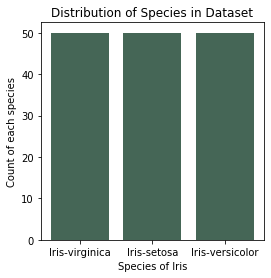

In [12]:
figure = plt.figure(figsize=(4,4))
plt.bar(species, counts, color = '#456656')
plt.title('Distribution of Species in Dataset')
plt.xlabel('Species of Iris')
plt.ylabel('Count of each species')
plt.show()

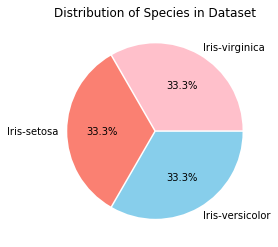

In [13]:
#Pie chart
#colors = sns.color_palette('rainbow')
plt.pie(counts, labels=species, autopct='%1.1f%%', colors = ['pink','salmon','skyblue'],
       explode = [0.01,0.01,0.01])
plt.title('Distribution of Species in Dataset')
plt.show()

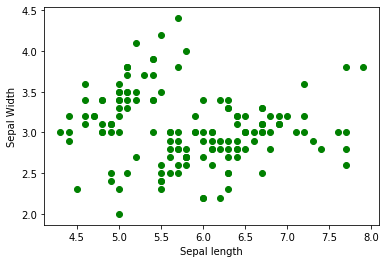

In [14]:
#Scatter plot
plt.scatter(iris['sepal_length'], iris['sepal_width'], color='green')
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.show()

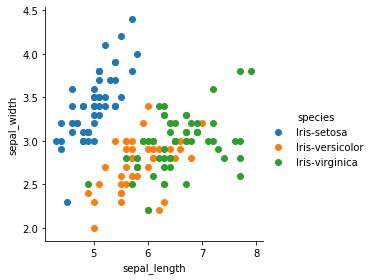

In [15]:
#Scatter plot using seaborn
sns.FacetGrid(iris, hue='species', height=4)\
.map(plt.scatter,'sepal_length','sepal_width')\
.add_legend()
plt.show()

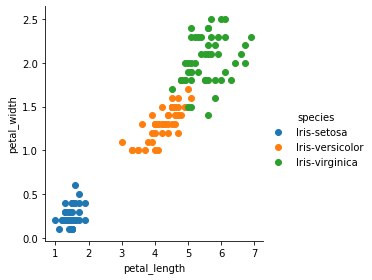

In [16]:
sns.FacetGrid(iris, hue='species', height=4)\
.map(plt.scatter,'petal_length','petal_width')\
.add_legend()
plt.show()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

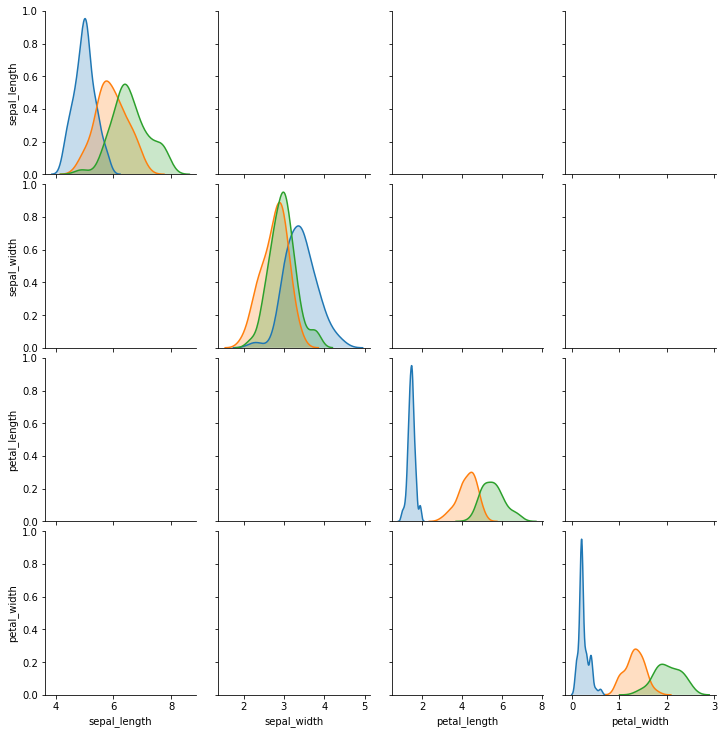

In [17]:
sns.pairplot(iris, hue='species')
plt.show()

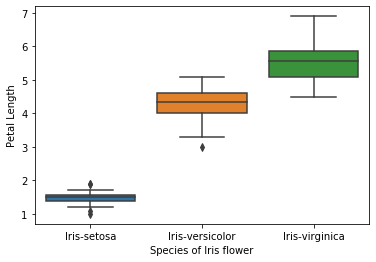

In [18]:
#Box plot for each species
sns.boxplot(x='species', y='petal_length', data=iris)
plt.xlabel('Species of Iris flower')
plt.ylabel('Petal Length')
plt.show()

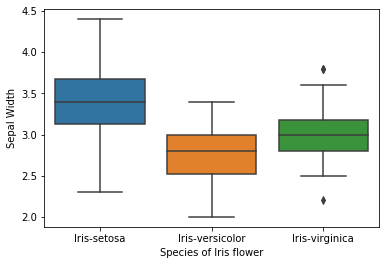

In [19]:
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.xlabel('Species of Iris flower')
plt.ylabel('Sepal Width')
plt.show()

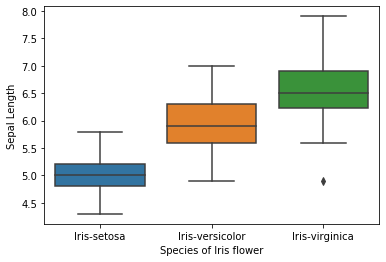

In [20]:
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.xlabel('Species of Iris flower')
plt.ylabel('Sepal Length')
plt.show()

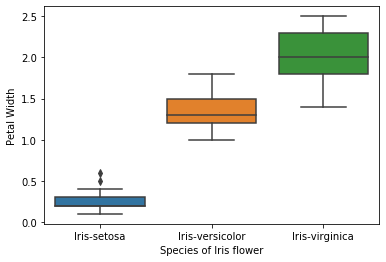

In [21]:
sns.boxplot(x='species', y='petal_width', data=iris)
plt.xlabel('Species of Iris flower')
plt.ylabel('Petal Width')
plt.show()

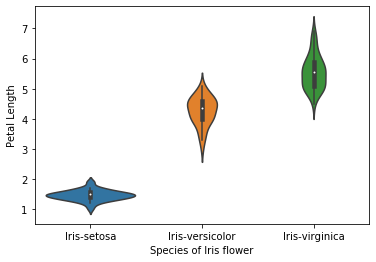

In [22]:
#Violine Plot
sns.violinplot(x='species', y='petal_length', data=iris)
plt.xlabel('Species of Iris flower')
plt.ylabel('Petal Length')
plt.show()

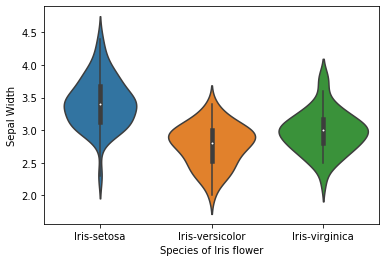

In [23]:
sns.violinplot(x='species', y='sepal_width', data=iris)
plt.xlabel('Species of Iris flower')
plt.ylabel('Sepal Width')
plt.show()

# Applying Machine learning

In [24]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X,y,test_size=0.2)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()
model.fit(x_tr,y_tr)
y_pr = model.predict(x_ts)

C:\Users\Nitin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_ts, y_pr)*100

90.0

In [30]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion='entropy', max_depth=5)  #Uses ID3 as entropy is used
cls.fit(x_tr, y_tr)
y_pred = cls.predict(x_ts)

C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [31]:
accuracy_score(y_ts, y_pred)*100

90.0

In [32]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)  #Uses CART as gini is used
model.fit(x_tr, y_tr)
y_pre = model.predict(x_ts)
accuracy_score(y_ts, y_pre)*100

90.0

# K Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_tr, y_tr)
y_pred = model.predict(x_ts)
accuracy_score(y_ts, y_pred)*100

93.33333333333333

# Support Vector Machine

In [47]:
from sklearn.svm import SVC

In [48]:
model = SVC()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_ts)
accuracy_score(y_ts, y_pred)*100

93.33333333333333